In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### Data visualization

<AxesSubplot:xlabel='Point of Contact', ylabel='count'>

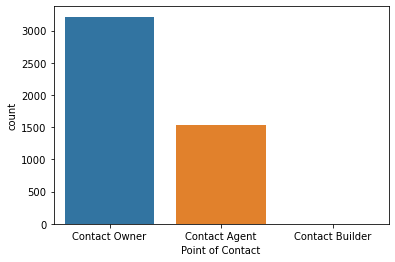

In [4]:
sns.countplot(x = 'Point of Contact', data = df)

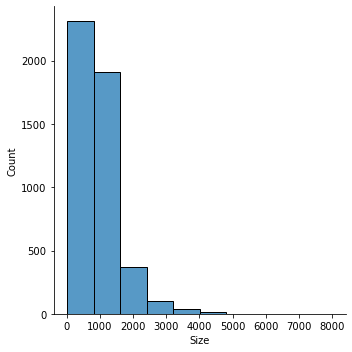

In [9]:
sns.displot(df['Size'], bins = 10)

In [18]:
x = df[['BHK', 'Size', 'Floor', 
    'Area Type', 'City', 'Furnishing Status', 
    'Tenant Preferred', 'Bathroom','Point of Contact']]

In [17]:
y = df['Rent']

In [19]:
x

,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...
4741,2,1000,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,2000,1 out of 4,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,1750,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,1500,23 out of 34,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [24]:
x.columns

Index(['BHK', 'Size', 'Floor', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [25]:
for i in x.columns:
    x[i] = LabelEncoder().fit_transform(x[i])

C:\Users\pak\AppData\Local\Temp/ipykernel_12172/3692155455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = LabelEncoder().fit_transform(x[i])
C:\Users\pak\AppData\Local\Temp/ipykernel_12172/3692155455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = LabelEncoder().fit_transform(x[i])
C:\Users\pak\AppData\Local\Temp/ipykernel_12172/3692155455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [26]:
x

,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,1,334,455,2,4,2,1,1,2
1,1,223,14,2,4,1,1,0,2
2,1,302,14,2,4,1,1,0,2
3,1,223,10,2,4,2,1,0,2
4,1,243,10,1,4,2,0,0,2
...,...,...,...,...,...,...,...,...,...
4741,1,302,271,1,3,1,1,1,2
4742,2,529,16,2,3,1,1,2,2
4743,2,491,271,1,3,1,1,2,0
4744,2,446,226,1,3,1,2,1,0


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
model = LinearRegression()

In [30]:
model.fit(x_train, y_train)

LinearRegression()

In [37]:
x_test.shape

(950, 9)

In [32]:
y_pred = model.predict(x_test)

In [38]:
mean_absolute_error(y_test, y_pred)/950

25.842650593441178